In [97]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from scipy.constants import hbar, k

In [98]:
a = 4e-10 #m
w0=1e13 # Hz
Ni=100
n = 1/a**3
kB=k

cV_high = 3*n*kB

TD = (hbar/kB)*(5 * 1e12) * (6*np.pi**2)**(1/3)
#TD = (hbar/kB)*(w0*np.pi/100)*np.power(3*Ni/(4*np.pi),1/3)


In [107]:
T = np.logspace(-3, 0, 100) * TD

In [108]:
m = np.linspace(-50, 49, Ni)
M1, M2, M3 = np.meshgrid(m, m, m)

k = np.array([M1*(2*np.pi)/(Ni*a), M2*(2*np.pi)/(Ni*a), M3*(2*np.pi)/(Ni*a)])

k = np.moveaxis(k, [0], [3])

In [109]:
w = w0*np.sin(norm(k, axis=3)*a/2)

In [110]:
alpha = (hbar*w[..., None]) / (kB*T)

In [111]:
cV_perK = (alpha**2) / (2*np.sinh(alpha/2))**2

cV_perK[alpha==0] = 0

cV = 3*kB/(Ni*a)**3 * np.sum(cV_perK, axis=(0,1,2))

/tmp/ipykernel_1816/3021049934.py:1: RuntimeWarning: invalid value encountered in true_divide
  cV_perK = (alpha**2) / (2*np.sinh(alpha/2))**2


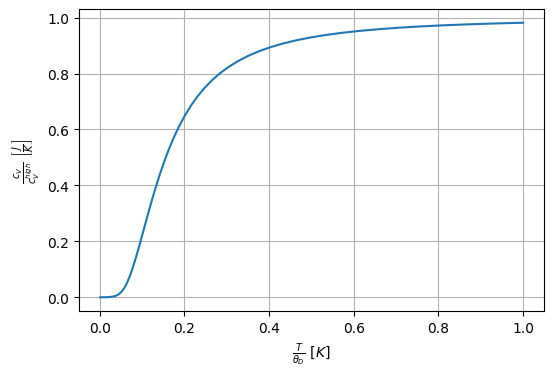

In [121]:
plt.figure(dpi=100)
plt.plot(T/TD, cV/cV_high)
plt.xlabel(r'$\frac{T}{\theta_D}$ $\left[ K \right]$')
plt.ylabel(r'$\frac{c_V}{c_V^{high}}$ $\left[ \frac{J}{K} \right]$')
plt.grid()
plt.savefig('a.png')
plt.show()

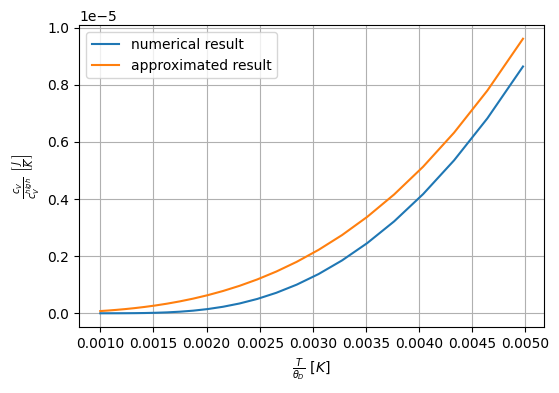

In [120]:
plt.figure(dpi=100)
trunc = T<(0.005*TD)
T_low = T[trunc]
cV_apprx = (12/5)*np.pi**4*n*kB*(T_low/TD)**3
plt.plot((T_low/TD), (cV/cV_high)[trunc], label='numerical result')
plt.plot(T_low/TD, cV_apprx/cV_high, label='approximated result')
plt.grid()
plt.legend()
plt.xlabel(r'$\frac{T}{\theta_D}$ $\left[ K \right]$')
plt.ylabel(r'$\frac{c_V}{c_V^{high}}$ $\left[ \frac{J}{K} \right]$')
plt.savefig('b.png')
plt.show()